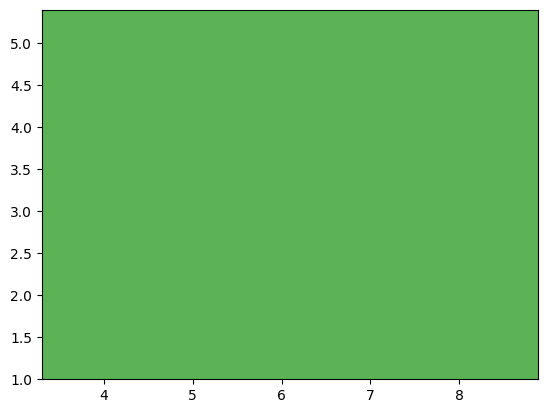

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. We could
 # avoid this ugly slicing by using a two-dim dataset
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='rbf', C=1,gamma=0).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

Text(0.5, 1.0, 'SVC with linear kernel')

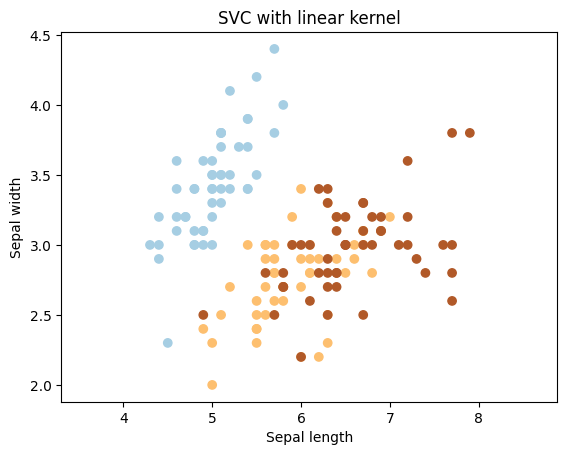

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')

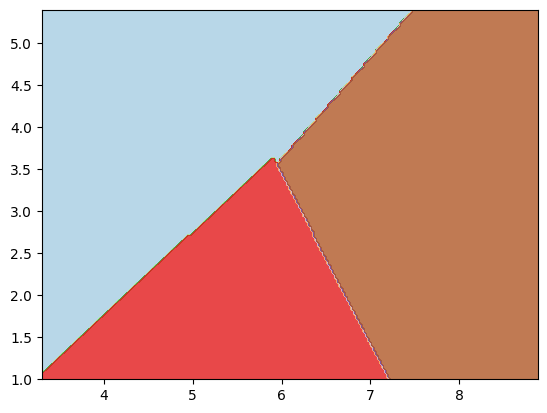

In [ ]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

Kernel: rbf
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<ipython-input-6-efa1f65c129e>:63: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', marker='x', label='Test')


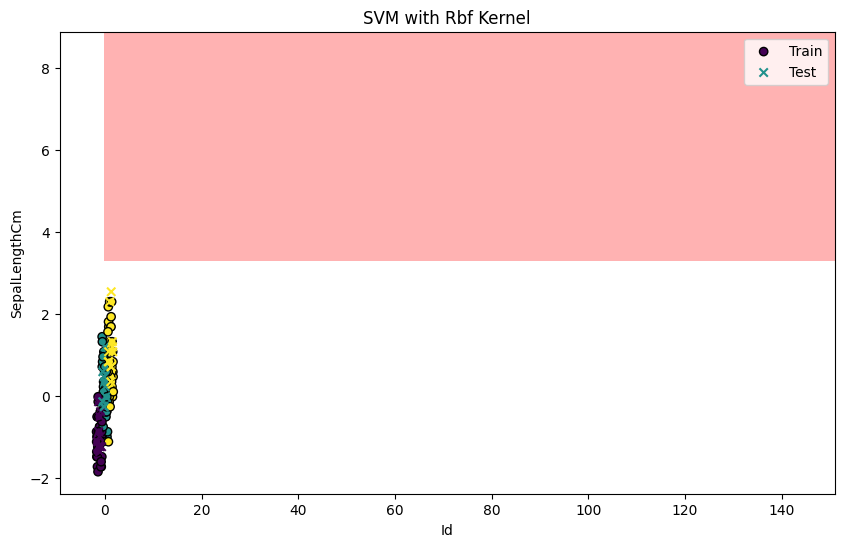

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib.colors import ListedColormap

# Load the Iris dataset
# Replace 'path_to_your_iris_dataset.csv' with your actual file path
iris_data = pd.read_csv('/content/Iris.csv')

# Prepare the data
X = iris_data.iloc[:, :-1].values  # Features
y = iris_data.iloc[:, -1].values    # Target

# Convert categorical target to numeric
le = LabelEncoder()
y = le.fit_transform(y)

# Select the first two features for visualization
X = X[:, :2]  # Only use the first two features

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to train, evaluate and plot SVM model
def evaluate_and_plot_svm(kernel):
    # Create SVM model
    svm_model = SVC(kernel=kernel, gamma='scale')

    # Train the model
    svm_model.fit(X_train, y_train)

    # Make predictions
    y_pred = svm_model.predict(X_test)

    # Evaluate the model
    print(f"Kernel: {kernel}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plotting decision boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'green', 'blue')))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='o', label='Train')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', marker='x', label='Test')
    plt.title(f'SVM with {kernel.capitalize()} Kernel')
    plt.xlabel(iris_data.columns[0])
    plt.ylabel(iris_data.columns[1])
    plt.legend()
    plt.show()

# Evaluate and plot SVM with RBF kernel
evaluate_and_plot_svm(kernel='rbf')

# Evaluate and plot SVM with Polynomial kernel


In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only the first two features for visualization
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVM with RBF kernel
rbf_svm = SVC(kernel='rbf', gamma='scale')
rbf_svm.fit(X_train, y_train)

# SVM with Polynomial kernel
poly_svm = SVC(kernel='poly', degree=3)
poly_svm.fit(X_train, y_train)

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.show()

# Plot decision boundaries for RBF SVM
plot_decision_boundaries(X_train, y_train, rbf_svm, "Decision Boundary for RBF SVM")

# Plot decision boundaries for Polynomial SVM
plot_decision_boundaries(X_train, y_train, poly_svm, "Decision Boundary for Polynomial SVM")

# Evaluation of RBF SVM
y_pred_rbf = rbf_svm.predict(X_test)
print("RBF SVM Classification Report:")
print(classification_report(y_test, y_pred_rbf))


# Evaluation of Polynomial SVM
y_pred_poly = poly_svm.predict(X_test)
print("Polynomial SVM Classification Report:")
print(classification_report(y_test, y_pred_poly))




AttributeError: 'DataFrame' object has no attribute 'data'

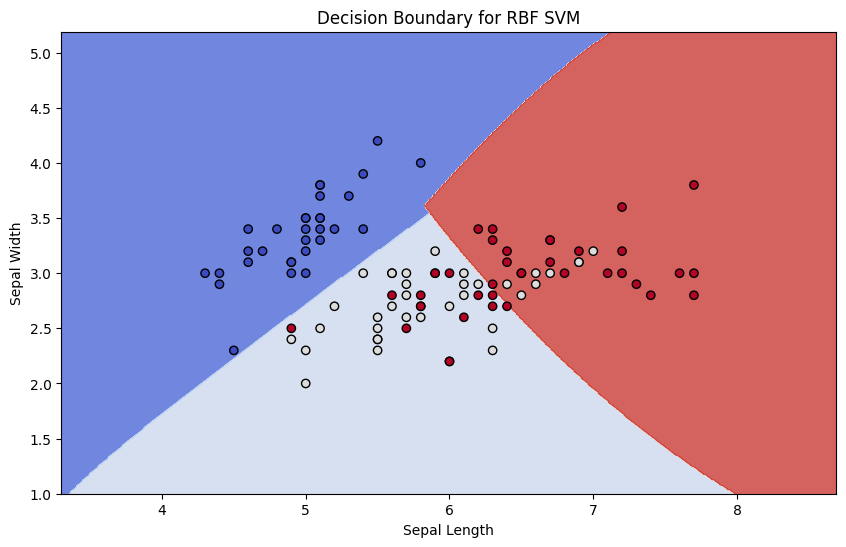

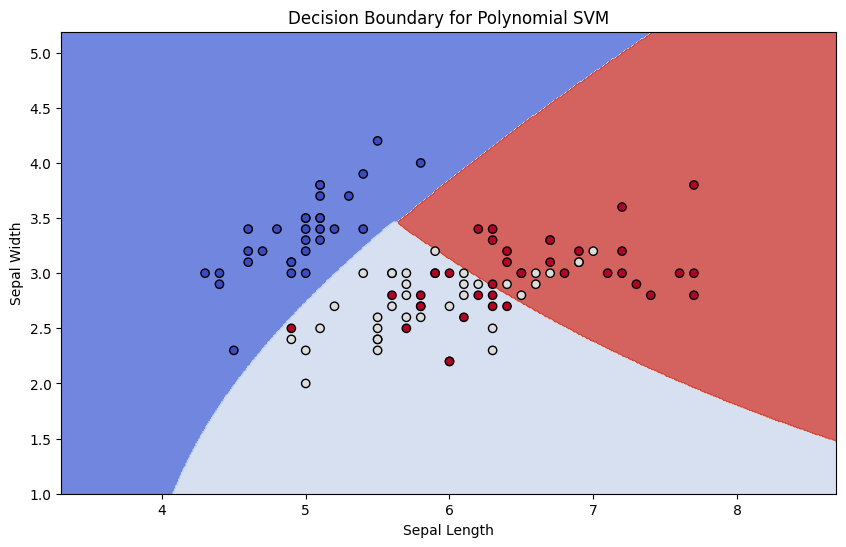

RBF SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.70      0.54      0.61        13
           2       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.81      0.80      0.80        45

Polynomial SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.54      0.54      0.54        13
           2       0.54      0.54      0.54        13

    accuracy                           0.73        45
   macro avg       0.69      0.69      0.69        45
weighted avg       0.73      0.73      0.73        45



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris = pd.read_csv("/content/Iris.csv")

# Extract features and target variable
X = iris.iloc[:, 1:3].values  # Use only the first two features for visualization
y = iris.iloc[:, 5].values  # Assuming the species column is at index 5

# Convert species to numerical labels if necessary
y = pd.factorize(y)[0]  # Converts to numerical values

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVM with RBF kernel
rbf_svm = SVC(kernel='rbf', gamma='scale')
rbf_svm.fit(X_train, y_train)

# SVM with Polynomial kernel
poly_svm = SVC(kernel='poly', degree=3)
poly_svm.fit(X_train, y_train)

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel('Sepal Length')  # You can change this to appropriate feature names
    plt.ylabel('Sepal Width')  # You can change this to appropriate feature names
    plt.show()

# Plot decision boundaries for RBF SVM
plot_decision_boundaries(X_train, y_train, rbf_svm, "Decision Boundary for RBF SVM")

# Plot decision boundaries for Polynomial SVM
plot_decision_boundaries(X_train, y_train, poly_svm, "Decision Boundary for Polynomial SVM")

# Evaluation of RBF SVM
y_pred_rbf = rbf_svm.predict(X_test)
print("RBF SVM Classification Report:")
print(classification_report(y_test, y_pred_rbf))

# Evaluation of Polynomial SVM
y_pred_poly = poly_svm.predict(X_test)
print("Polynomial SVM Classification Report:")
print(classification_report(y_test, y_pred_poly))


RBF SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.70      0.54      0.61        13
           2       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.81      0.80      0.80        45

Polynomial SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.54      0.54      0.54        13
           2       0.54      0.54      0.54        13

    accuracy                           0.73        45
   macro avg       0.69      0.69      0.69        45
weighted avg       0.73      0.73      0.73        45



<ipython-input-21-52ca79fe6b9f>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=metrics_df, palette='viridis')


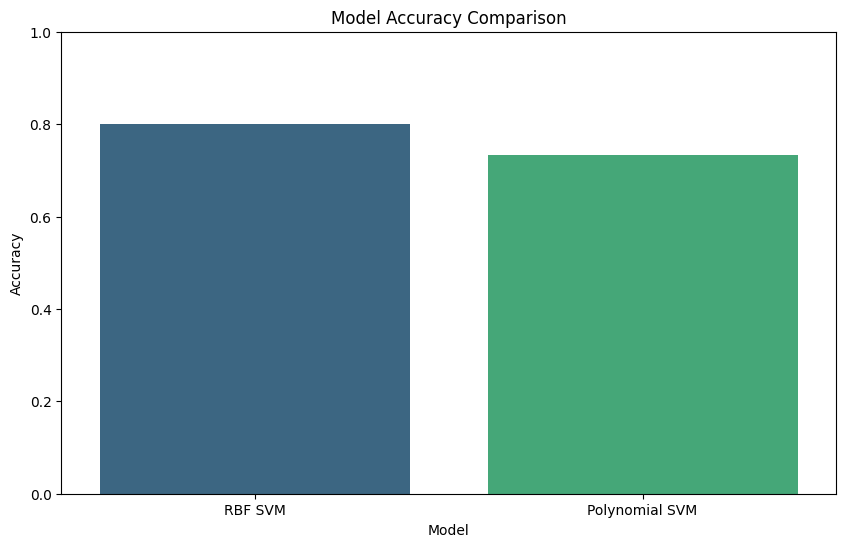

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris = pd.read_csv("/content/Iris.csv")

# Extract features and target variable
X = iris.iloc[:, 1:3].values  # Use only the first two features for visualization
y = iris.iloc[:, 5].values  # Assuming the species column is at index 5

# Convert species to numerical labels if necessary
y = pd.factorize(y)[0]  # Converts to numerical values

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVM with RBF kernel
rbf_svm = SVC(kernel='rbf', gamma='scale')
rbf_svm.fit(X_train, y_train)
y_pred_rbf = rbf_svm.predict(X_test)

# SVM with Polynomial kernel
poly_svm = SVC(kernel='poly', degree=3)
poly_svm.fit(X_train, y_train)
y_pred_poly = poly_svm.predict(X_test)

# Evaluation Metrics
metrics = {
    'Model': ['RBF SVM', 'Polynomial SVM'],
    'Accuracy': [accuracy_score(y_test, y_pred_rbf), accuracy_score(y_test, y_pred_poly)],
}

# Create a DataFrame for metrics
metrics_df = pd.DataFrame(metrics)

# Print classification reports
print("RBF SVM Classification Report:")
print(classification_report(y_test, y_pred_rbf))

print("Polynomial SVM Classification Report:")
print(classification_report(y_test, y_pred_poly))

# Statistical Comparison Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=metrics_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris = pd.read_csv("/content/Iris.csv")

In [ ]:
# Extract features and target variable (for binary classification)
# Here we choose only two classes (e.g., Setosa and Versicolor) for simplicity
iris = iris[iris['Species'].isin(['Iris-setosa', 'Iris-versicolor'])]
X = iris.iloc[:, 1:3].values  # Using only the first two features
y = pd.factorize(iris['Species'])[0]  # Convert species to numerical labels

In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)